In [1]:
import numpy as np 
import pandas as pd

base_path = "/Users/kennethzhang/Desktop/VolAuction/data"

In [2]:
es_futures = pd.read_csv(base_path + "/es_futures_1m_all.csv")
es_futures['Datetime'] = pd.to_datetime(es_futures["Datetime"])
es_futures = es_futures.set_index('Datetime').sort_index()
es_futures.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Datetime,,,,,,,,
2025-03-24 00:00:00-04:00,5754.0,5754.00,5752.75,5753.00,0,0.0,0.0,2025-03-24
2025-03-24 00:01:00-04:00,5753.0,5753.00,5752.75,5752.75,75,0.0,0.0,2025-03-24
2025-03-24 00:02:00-04:00,5753.0,5753.25,5752.75,5753.25,18,0.0,0.0,2025-03-24
2025-03-24 00:03:00-04:00,5753.0,5753.00,5752.50,5752.50,85,0.0,0.0,2025-03-24
2025-03-24 00:04:00-04:00,5752.5,5753.25,5752.50,5753.00,62,0.0,0.0,2025-03-24


In [6]:
es_futures['time'] = es_futures.index.time
es_futures['date'] = es_futures.index.date

close_df = es_futures[es_futures['time'] == pd.to_datetime("16:00:00").time()].copy()
open_df = es_futures[es_futures['time'] == pd.to_datetime("09:30:00").time()].copy()

In [7]:
close_df = close_df[['Close', 'date']].rename(columns={'Close': 'close'})
open_df = open_df[['Close', 'date']].rename(columns={'Close': 'open'})

close_df['date'] = close_df.index.date
open_df['date'] = open_df.index.date

In [8]:
merged = pd.merge(close_df, open_df, on='date', how='inner')
merged = merged.shift(-1).dropna()
merged['overnight_return'] = np.log(merged['open'] / merged['close'])

In [9]:
merged

,close,date,open,overnight_return
0,5828.50,2025-03-25,5828.25,-0.000043
1,5759.00,2025-03-26,5826.00,0.011567
2,5744.75,2025-03-27,5744.00,-0.000131
3,5622.25,2025-03-28,5722.75,0.017718
4,5643.75,2025-03-31,5566.75,-0.013737


In [10]:
log_returns = merged['overnight_return']

In [11]:
window_size = 10 
if len(log_returns) >= window_size:
    log_returns = log_returns[-window_size:]

In [16]:
es_intraday['Close'].values

array([5566.75, 5565.25, 5559.5 , 5554.25, 5552.5 , 5555.25, 5558.75,
       5555.  , 5556.25, 5555.5 , 5548.5 , 5546.25, 5548.25, 5544.5 ,
       5539.75, 5535.5 , 5540.75, 5539.5 , 5539.25, 5542.5 , 5544.75,
       5552.25, 5552.5 , 5556.75, 5558.5 , 5563.75, 5565.5 , 5566.25,
       5564.  , 5562.5 , 5570.  , 5574.  , 5573.5 , 5568.  , 5570.25,
       5570.25, 5573.5 , 5574.  , 5579.25, 5579.  , 5576.75, 5573.  ,
       5574.5 , 5570.25, 5574.5 , 5572.75, 5567.25, 5566.  , 5564.5 ,
       5563.  , 5564.75, 5562.5 , 5562.  , 5561.  , 5563.  , 5562.5 ,
       5562.  , 5562.  , 5563.  , 5559.75, 5566.  , 5568.  , 5571.25,
       5578.75, 5582.5 , 5580.  , 5578.75, 5574.  , 5579.5 , 5578.5 ,
       5578.5 , 5579.5 , 5573.  , 5573.5 , 5574.  , 5576.75, 5582.75,
       5581.25, 5580.5 , 5581.25, 5583.  , 5575.75, 5574.5 , 5575.5 ,
       5580.5 , 5578.75, 5577.75, 5578.25, 5580.25, 5581.5 , 5585.  ,
       5586.25, 5587.25, 5585.25, 5586.25, 5585.75, 5585.75, 5590.75,
       5584.25, 5581

In [17]:
latest_date = es_futures['date'].max()
es_intraday = es_futures[(es_futures['date'] == latest_date) & (es_futures['time'] >= pd.to_datetime("09:30:00").time())]
es_prices = es_intraday['Close'].values
S0 = es_prices[0] if len(es_prices) > 0 else es_futures.iloc[-1]['Close']

In [28]:
T = 1 / 6.5
dt = 1 / 390
n_paths = 1000
N = int(T / dt)
paths = np.zeros((n_paths, N))
paths[:, 0] = S0
paths

array([[5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [5566.75,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [31]:
threshold = 3
mu = log_returns.mean()
sigma = log_returns.std()
jumps = log_returns[np.abs(log_returns - mu) > threshold * sigma]
lambda_ = len(jumps) / len(log_returns)
jump_mean = -abs(jumps.mean()) if len(jumps) > 0 else -0.0001
jump_std = jumps.std() * 1.5 if len(jumps) > 0 else 0.0002       
lambda_ *= 2 

In [32]:
for i in range(n_paths):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        dN = np.random.poisson(lambda_ * dt)
        J = -abs(np.random.normal(jump_mean, jump_std)) if dN else 0
        paths[i, t] = paths[i, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW + J)

In [38]:
log_returns_paths = np.log(paths[:, 1:] / paths[:, :-1])
path_vols = np.std(log_returns_paths, axis=1) * np.sqrt(390)
mean_vol = np.mean(path_vols)
std_vol = np.std(path_vols)

print("Forecasted Open-to-Close Realized Volatility (mean):", mean_vol)
print("Std of Vol Forecast (across paths):", std_vol)
print("Rolling Window Used (days):", window_size)
print("Lambda (jump intensity):", lambda_)
print("Jump Mean (biased down):", jump_mean)
print("Jump Std (inflated):", jump_std)

Forecasted Open-to-Close Realized Volatility (mean): 0.01199629767169044
Std of Vol Forecast (across paths): 0.0010922520284302865
Rolling Window Used (days): 10
Lambda (jump intensity): 0.0
Jump Mean (biased down): -0.0001
Jump Std (inflated): 0.0002


% of Actual Path Within 5-95% Sim Band: 83.33%
Z-score of Realized Vol: -0.24


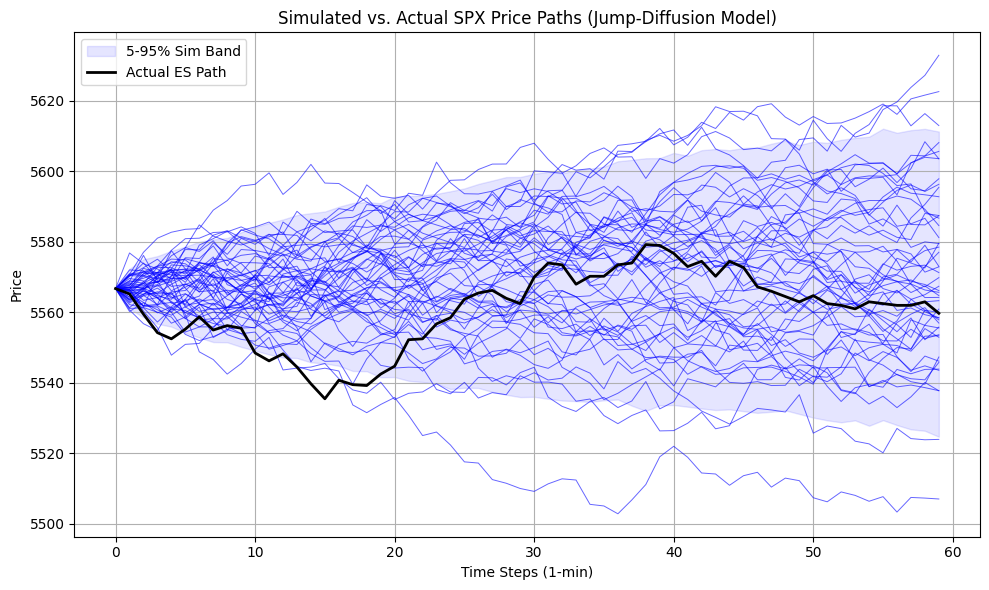

In [39]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
for i in range(50):
    plt.plot(paths[i], linewidth=0.7, alpha=0.6, color='blue')

lower_band = np.percentile(paths, 5, axis=0)
upper_band = np.percentile(paths, 95, axis=0)
plt.fill_between(range(N), lower_band, upper_band, color='blue', alpha=0.1, label='5-95% Sim Band')

es_prices = es_prices[:N]  
if len(es_prices) == N:
    plt.plot(es_prices, linewidth=2, color='black', label='Actual ES Path')

    within_band = ((es_prices >= lower_band) & (es_prices <= upper_band)).mean()
    print(f"% of Actual Path Within 5-95% Sim Band: {within_band:.2%}")

    realized_vol = np.std(np.log(es_prices[1:] / es_prices[:-1])) * np.sqrt(390)
    z_score = (realized_vol - mean_vol) / std_vol
    print(f"Z-score of Realized Vol: {z_score:.2f}")

plt.title("Simulated vs. Actual SPX Price Paths (Jump-Diffusion Model)")
plt.xlabel("Time Steps (1-min)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

% of Actual Path Within 5–95% Sim Band: 83.33%
Z-score of Realized Vol: -0.24


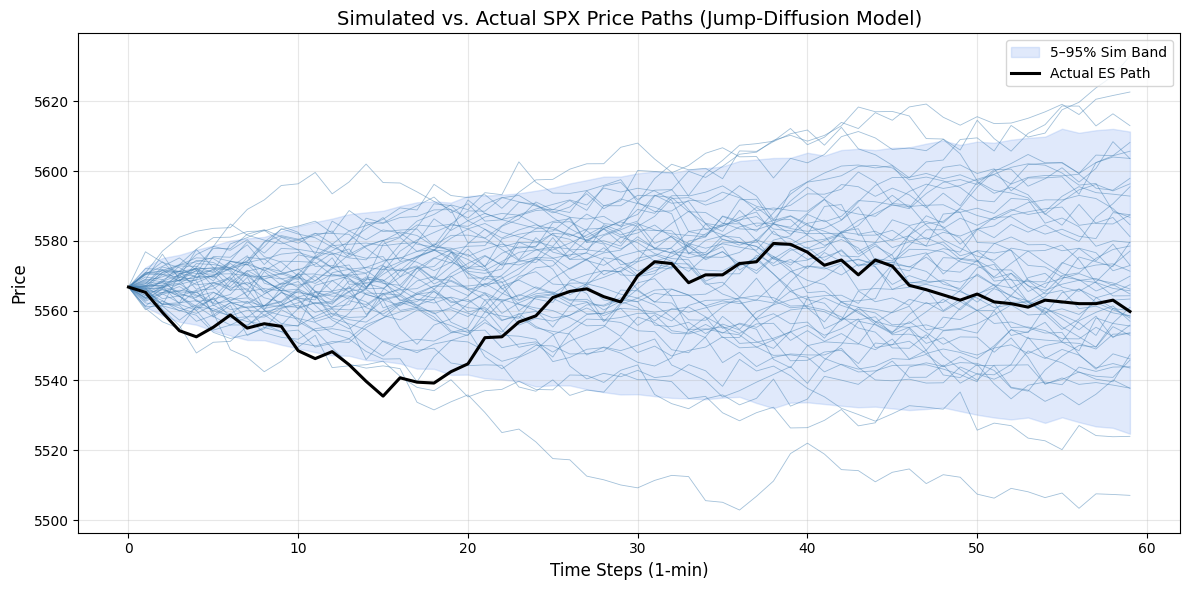

In [40]:
plt.figure(figsize=(12, 6))
for i in range(50):
    plt.plot(paths[i], linewidth=0.6, alpha=0.5, color='steelblue')

lower_band = np.percentile(paths, 5, axis=0)
upper_band = np.percentile(paths, 95, axis=0)
plt.fill_between(range(N), lower_band, upper_band, color='cornflowerblue', alpha=0.2, label='5–95% Sim Band')

es_prices = es_prices[:N]
if len(es_prices) == N:
    plt.plot(es_prices, linewidth=2.2, color='black', label='Actual ES Path')

    within_band = ((es_prices >= lower_band) & (es_prices <= upper_band)).mean()
    print(f"% of Actual Path Within 5–95% Sim Band: {within_band:.2%}")

    realized_vol = np.std(np.log(es_prices[1:] / es_prices[:-1])) * np.sqrt(390)
    z_score = (realized_vol - mean_vol) / std_vol
    print(f"Z-score of Realized Vol: {z_score:.2f}")

plt.title("Simulated vs. Actual SPX Price Paths (Jump-Diffusion Model)", fontsize=14)
plt.xlabel("Time Steps (1-min)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Grid Search - Parameterizing our Jump-Diffusion Model

In [41]:
n_samples = 25
np.random.seed(42)
thresholds = np.random.uniform(2.0, 3.5, n_samples)
std_scales = np.random.uniform(0.9, 1.6, n_samples)
lambda_scales = np.random.uniform(1.0, 2.0, n_samples)

In [42]:
results = []
latest_date = es_futures['date'].max()
es_intraday = es_futures[(es_futures['date'] == latest_date) & (es_futures['time'] >= pd.to_datetime("09:30:00").time())]
es_prices = es_intraday['Close'].values
S0 = es_prices[0] if len(es_prices) > 0 else es_futures.iloc[-1]['Close']

In [55]:
T = 1 / 6.5
dt = 1 / 390
n_paths = 1000
N = int(T / dt)
best_paths = None

for threshold, std_scale, lambda_scale in zip(thresholds, std_scales, lambda_scales):
    jumps = log_returns[np.abs(log_returns - mu) > threshold * sigma]
    lambda_ = len(jumps) / len(log_returns) * lambda_scale
    jump_mean = -abs(jumps.mean()) if len(jumps) > 0 else -0.0001
    jump_std = jumps.std() * std_scale if len(jumps) > 0 else 0.0002

    paths = np.zeros((n_paths, N))
    paths[:, 0] = S0

    for i in range(n_paths):
        for t in range(1, N):
            dW = np.random.normal(0, np.sqrt(dt))
            dN = np.random.poisson(lambda_ * dt)
            J = -abs(np.random.normal(jump_mean, jump_std)) if dN else 0
            paths[i, t] = paths[i, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW + J)

    lower_band = np.percentile(paths, 5, axis=0)
    upper_band = np.percentile(paths, 95, axis=0)

    if len(es_prices) >= N:
        es_prices_clipped = es_prices[:N]
        within_band = ((es_prices_clipped >= lower_band) & (es_prices_clipped <= upper_band)).mean()
        log_returns_paths = np.log(paths[:, 1:] / paths[:, :-1])
        path_vols = np.std(log_returns_paths, axis=1) * np.sqrt(390)
        mean_vol = np.mean(path_vols)
        std_vol = np.std(path_vols)
        realized_vol = np.std(np.log(es_prices_clipped[1:] / es_prices_clipped[:-1])) * np.sqrt(390)
        z_score = (realized_vol - mean_vol) / std_vol
        results.append((threshold, std_scale, lambda_scale, within_band, z_score))

        if abs(z_score) < 0.2 and best_paths is None:
            best_paths = paths.copy()

In [56]:
results = sorted(results, key=lambda x: abs(x[4]))  
print("Top parameter sets by z-score closeness to realized vol:\n")
for r in results[:5]:
    print(f"Threshold: {r[0]:.2f}, StdScale: {r[1]:.2f}, LambdaScale: {r[2]:.2f} — Coverage: {r[3]*100:.2f}%, Z-score: {r[4]:.2f}")

Top parameter sets by z-score closeness to realized vol:

Threshold: 3.45, StdScale: 1.11, LambdaScale: 1.27 — Coverage: 80.00%, Z-score: -0.14
Threshold: 3.30, StdScale: 0.95, LambdaScale: 1.20 — Coverage: 78.33%, Z-score: -0.16
Threshold: 3.45, StdScale: 1.11, LambdaScale: 1.27 — Coverage: 81.67%, Z-score: -0.16
Threshold: 2.32, StdScale: 1.38, LambdaScale: 1.36 — Coverage: 83.33%, Z-score: -0.16
Threshold: 2.23, StdScale: 0.93, LambdaScale: 1.60 — Coverage: 83.33%, Z-score: -0.17


In [57]:
results_df = pd.DataFrame(results, columns=['Threshold', 'StdScale', 'LambdaScale', 'Coverage', 'ZScore'])

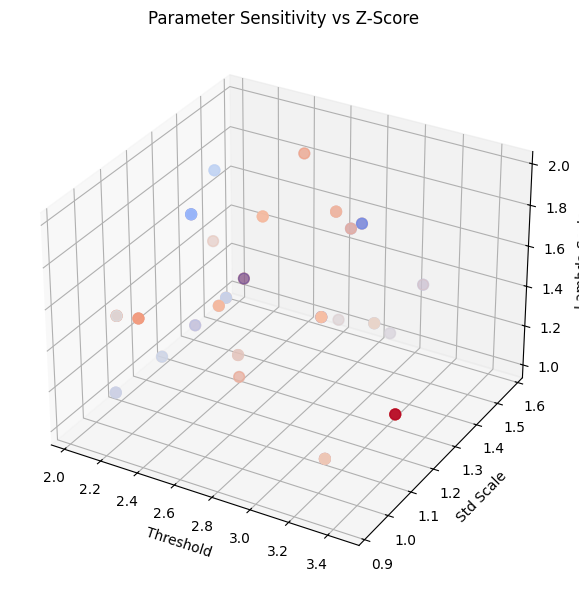

In [58]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df['Threshold'], results_df['StdScale'], results_df['LambdaScale'], c=results_df['ZScore'], cmap='coolwarm', s=60)
ax.set_xlabel('Threshold')
ax.set_ylabel('Std Scale')
ax.set_zlabel('Lambda Scale')
ax.set_title('Parameter Sensitivity vs Z-Score')
plt.tight_layout()
plt.show()

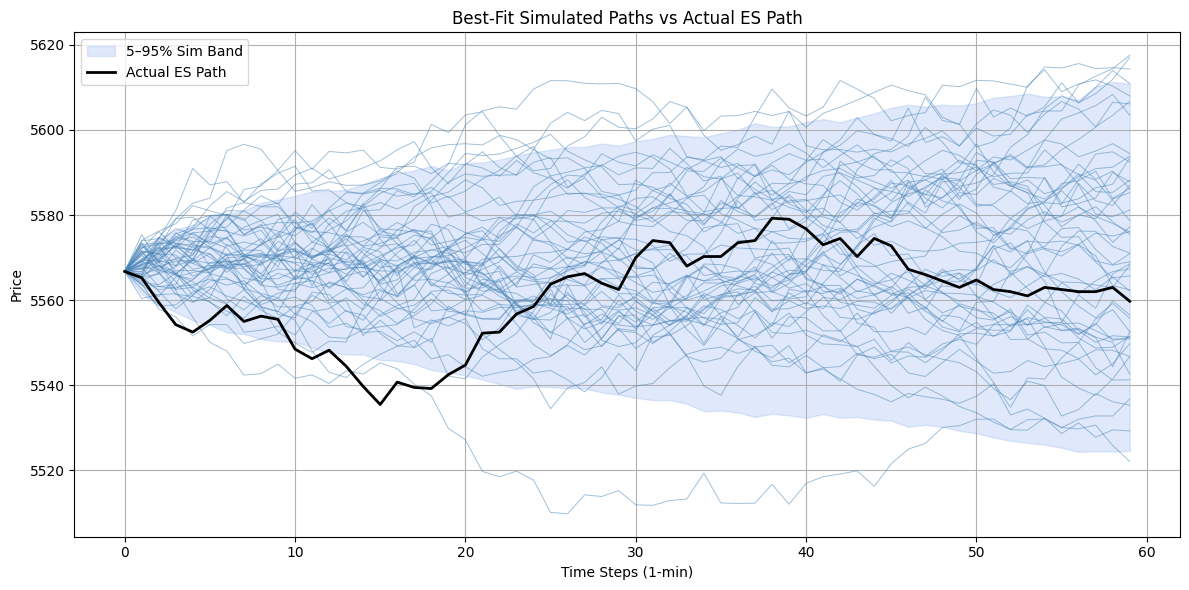

In [59]:
if best_paths is not None:
    plt.figure(figsize=(12, 6))
    for i in range(50):
        plt.plot(best_paths[i], linewidth=0.7, alpha=0.5, color='steelblue')

    lower_band = np.percentile(best_paths, 5, axis=0)
    upper_band = np.percentile(best_paths, 95, axis=0)
    plt.fill_between(range(N), lower_band, upper_band, color='cornflowerblue', alpha=0.2, label='5–95% Sim Band')

    plt.plot(es_prices[:N], linewidth=2, color='black', label='Actual ES Path')
    plt.title("Best-Fit Simulated Paths vs Actual ES Path")
    plt.xlabel("Time Steps (1-min)")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [60]:
params = {
    "lambda": lambda_,
    "jump_mean": jump_mean,
    "jump_std": jump_std,
    "mu": mu,
    "sigma": sigma,
    "mean_vol": mean_vol,
    "std_vol": std_vol
}
pd.DataFrame([params]).to_csv("/Users/kennethzhang/Desktop/VolAuction/data/jump_forecast_parameters.csv", index=False)

In [61]:
np.save("/Users/kennethzhang/Desktop/VolAuction/data/simulated_paths.npy", best_paths)